In [119]:
##State of the Art System

In [120]:
!pip install mtcnn # MTCNN stands for Multi Task Cascade Convolution Neural Network

In [3]:
#It  does Face classification
#Then it does bounding box regression
#It's also going to do landmark detection

In [121]:
from mtcnn.mtcnn import MTCNN
import cv2

In [122]:
img=cv2.imread("/content/lucky copy.jpg")

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [124]:
detector=MTCNN()
faces=detector.detect_faces(img)
for face in faces :
  print(face)

{'box': [176, 137, 238, 285], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (239, 248), 'right_eye': (356, 246), 'nose': (296, 306), 'mouth_left': (242, 353), 'mouth_right': (353, 355)}}


In [138]:
def create_box(image):
  img=cv2.imread(image)
  faces=detector.detect_faces(img)
  for face in faces:
     bounding_box=face["box"]
     keypoints=face["keypoints"]
     cv2.rectangle(img,
                (bounding_box[0],bounding_box[1]),
                (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                (205,200,230),2)
     cv2.circle(img,keypoints["left_eye"],5,(255,255,0))
     cv2.circle(img,keypoints["right_eye"],5,(255,100,100))
     cv2.circle(img,keypoints["nose"],5,(155,100,200))
  return img

In [ ]:
detcted_image=create_box("/content/mask.jpg")
cv2_imshow(detcted_image)

In [127]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

In [128]:
model=load_model("/content/My_model_mobile.h5")
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [187]:
def predict_mask(image):
  img=cv2.imread(image)
  faces=detector.detect_faces(img)
  for face in faces:
     bounding_box=face["box"]
     keypoints=face["keypoints"]
     cv2.rectangle(img,
                (bounding_box[0],bounding_box[1]),
                (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                (205,200,230),2)
     cropped_img=img[bounding_box[0]-50:bounding_box[0]+bounding_box[2]+50,
                   bounding_box[1]-50: bounding_box[1]+bounding_box[3]+50 ]
     resized_img=cv2.resize(cropped_img,(224,224))
     pred_img=resized_img[np.newaxis]
     pred_img=pred_img/255.0
     pred=model.predict(pred_img)
     val=np.round(pred[0][0],2)
     cv2.putText(img,f"mask {((1-val)*100):.2f} %",(bounding_box[0]+40,bounding_box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,
                 0.7,(2, 232, 105),1,cv2.LINE_AA)
  return img

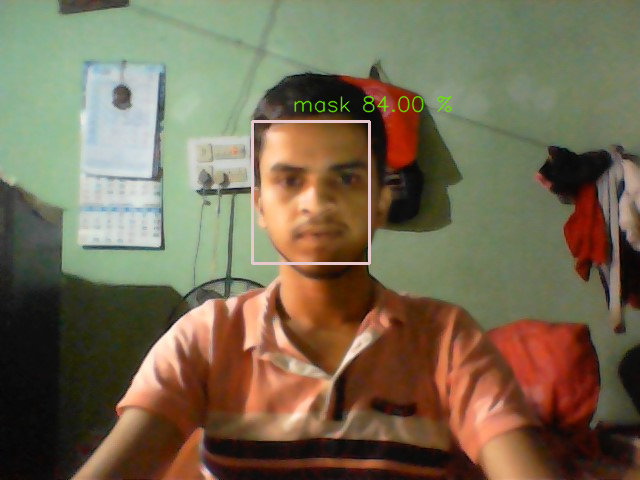

In [192]:
img_det=predict_mask("/content/Nomask1.jpg")
cv2_imshow(img_det)

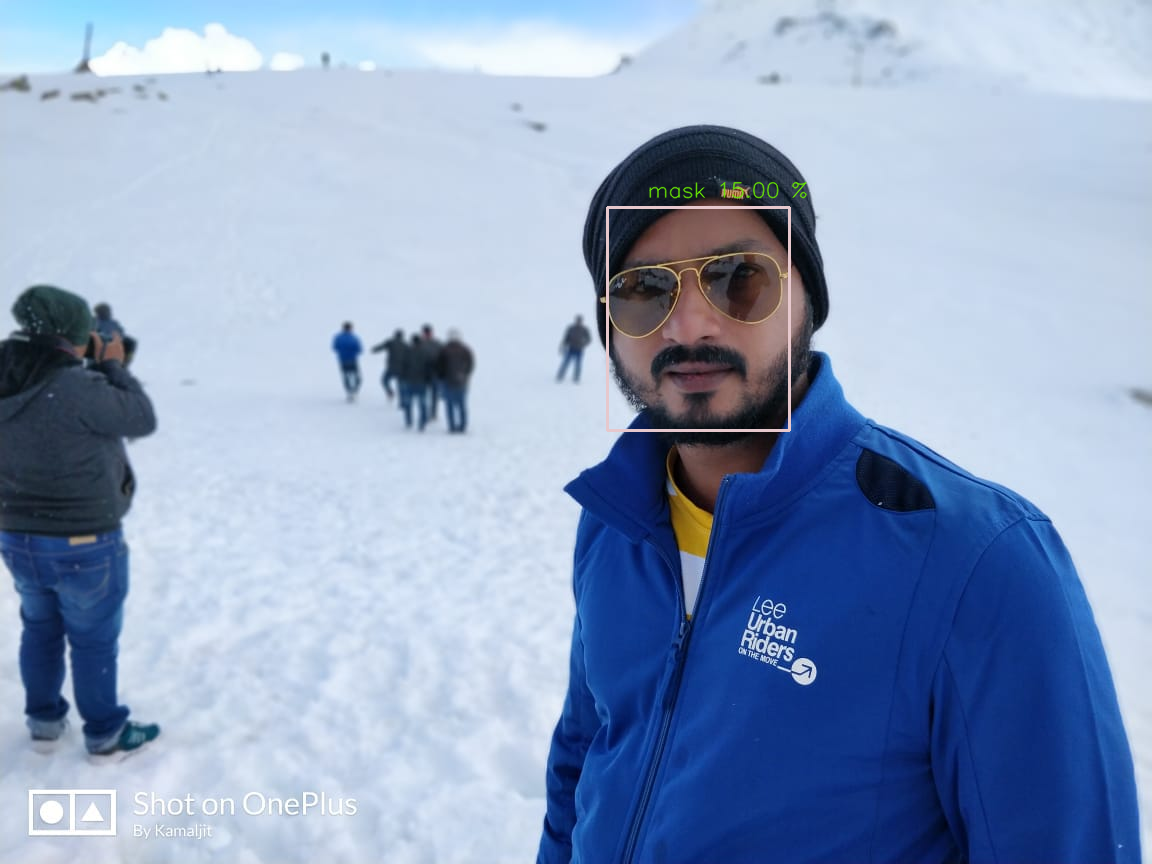

In [193]:
img_det=predict_mask("/content/nomask2.jpg")
cv2_imshow(img_det)

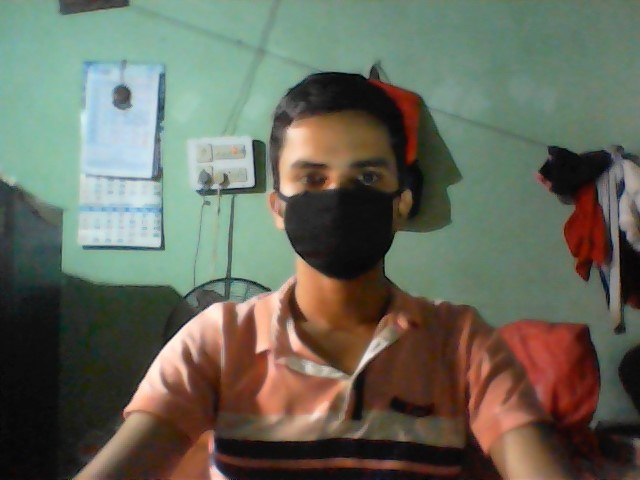

In [195]:
img_det=predict_mask("/content/mask1.jpg")
cv2_imshow(img_det)

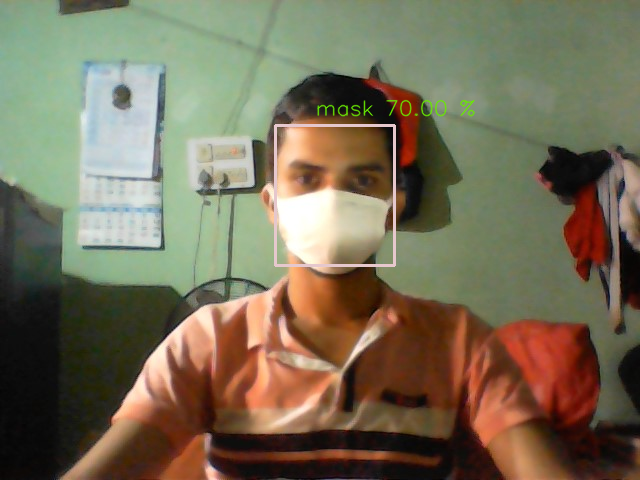

In [196]:
img_det=predict_mask("/content/mask2.jpg")
cv2_imshow(img_det)

In [199]:
image=cv2.imread("/content/Nomask1.jpg")
img=cv2.resize(image,(224,224))
img=img/255.0
img=img[np.newaxis]
print(model.predict(img))

[[0.33476698]]
